# EJERCICIOS

In [3]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.io import loadmat
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Normalization,Input,Flatten

## EJERCICIO 1

¿Cuántas neuronas hacen falta en la capa de salida para clasificar emails entre correo no deseado y correo deseado? 

¿Qué función de activación deberías usar en la capa de salida? 

Si, en cambio, quieres enfrentarte a MNIST, ¿cuántas neuronas necesitas en la capa de salida y qué función de activación deberías usar? 

¿Y si quieres que la red prediga los precios de la vivienda en California?

- Necesitaremos 1 neurona y utilizaremos la funcion de activacion Sigmoide que es la que se utiliza para clasificacion binaria.
- Para Mnist necesitaremos 10 neuronas de salida ya que queremos clasificar imagenes de digitos del 0 al 9 y utilizaremos de funcion de activacion softmax que convierte los valores de salida de las neuronas en probabilidades
- Para predecir el precio de las viviendas en california necesitaremos 1 neurona de salida y debido a que es una regresion utilizaremos una función de activación lineal o ninguna activación

## EJERCICIO 2

Entrena un red neuronal profunda con el conjunto de datos MNIST (puedes cargarlo con tf. keras. datasets.minst.load_data()). Intenta conseguir la mejor pruebas en el conjunto de validación  ajustando los hiperparámetros de modo manual. Prueba a buscar una buena tasa de aprendizaje y utiliza la detención temprana (mínimo hay que conseguir un 97%).

Pasos a seguir: 
+ Entrena varios modelos con distintas tasas de aprendizaje
+ Guarda cada modelo en un fichero
+ Carga cada modelo y evalúalo en el conjunto de cargas y quedate con programación con el mejor (bucle que se quede con el mejor), mostrando la tasa de aprendizaje y la exactitud del mejor modelo.

Si no obtienes más de un 97% vuelve a empezar.

In [2]:
# Cargar datos de MNIST
data= tf.keras.datasets.mnist.load_data()
(x_train, y_train), (x_test, y_test) = data

# Dividir los datos de entrenamiento en entrenamiento y validación
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

# Crear una función para definir el modelo
def create_model(learning_rate):
    model = tf.keras.Sequential([
        tf.keras.layers.Input(shape=(28, 28)),  # Aplanar la imagen de 28x28 a un vector de 784
        tf.keras.layers.Flatten(), # Aplanar la imagen de 28x28 a un vector de 784
        tf.keras.layers.Normalization(), # Capa de normalización de las entradas
        tf.keras.layers.Dense(250,activation='relu'),  # Capa densa de 250 neuronas
        tf.keras.layers.Dense(200,activation='relu'),  # Capa densa de 200 neuronas
        tf.keras.layers.Dense(128,activation='relu'), # Capa densa de 128 neuronas
        tf.keras.layers.Dense(90,activation='relu'),  # Capa densa de 90 neuronas
        tf.keras.layers.Dropout(0.2),  # Capa de regularización con Dropout
        tf.keras.layers.Dense(10, activation='softmax')  # 10 clases para la salida
    ])
    
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    
    return model

# Configuración para la detención temprana
early_stopping = EarlyStopping(monitor='val_accuracy', patience=3, restore_best_weights=True)

# Diferentes tasas de aprendizaje a probar
learning_rates = [0.001, 0.01, 0.1, 0.0001]

# Entrenar modelos con distintas tasas de aprendizaje
for lr in learning_rates:
    print(f"Entrenando modelo con tasa de aprendizaje: {lr}")
    path=f"Modelo_{lr}.keras"
    # Crear el modelo
    model = create_model(lr)
    
    # Entrenar el modelo
    history = model.fit(x_train, y_train, epochs=15, validation_data=(x_val, y_val),
                        callbacks=[early_stopping], batch_size=64)
    
    # Evaluar el modelo en el conjunto de validación
    val_accuracy = model.evaluate(x_val, y_val, verbose=0)[1]
    print(f"Exactitud en validación con tasa de aprendizaje {lr}: {val_accuracy}")

    print(f"Guardando modelo en {path}")
    model.save(path)

best_model = None
best_accuracy = 0
best_lr = None   

for i in range(len(learning_rates)):
    print(f"Modelo_{learning_rates[i]}.keras")
    model = tf.keras.models.load_model(f"Modelo_{learning_rates[i]}.keras")
    test_accuracy = model.evaluate(x_test, y_test)[1]
    print(f"Exactitud en el conjunto de prueba: {test_accuracy}")

     # Guardar el modelo si es el mejor
    if test_accuracy > best_accuracy:
        best_accuracy = test_accuracy
        best_lr = lr
print(f"Mejor modelo: Modelo_{best_lr}.keras con exactitud: {best_accuracy}")

Entrenando modelo con tasa de aprendizaje: 0.001
Epoch 1/15


2025-01-13 17:16:01.282522: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.7394 - loss: 3.5002 - val_accuracy: 0.9215 - val_loss: 0.2690
Epoch 2/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9278 - loss: 0.2608 - val_accuracy: 0.9461 - val_loss: 0.1963
Epoch 3/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9469 - loss: 0.1932 - val_accuracy: 0.9448 - val_loss: 0.2160
Epoch 4/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9563 - loss: 0.1553 - val_accuracy: 0.9551 - val_loss: 0.1649
Epoch 5/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9627 - loss: 0.1376 - val_accuracy: 0.9553 - val_loss: 0.1805
Epoch 6/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9681 - loss: 0.1156 - val_accuracy: 0.9614 - val_loss: 0.1469
Epoch 7/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9718 - loss: 0.1004 - val_accuracy: 0.9571 - val_loss: 0.1597
Epoch 8/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9728 - loss: 0.0965 - val_accuracy: 0.9597 - val_

## EJERCICIO 3

Clasificación de Imágenes de Dígitos Escritos a Mano:

* Objetivo: Entrenar una red neuronal para clasificar imágenes de dígitos escritos a mano utilizando el conjunto de datos SVHN (Street View House Numbers).

* Tareas: 
    * Cargar el conjunto de datos, dividir los datos (train, valid y test), explorar los datos representando alguna imagen con su etiqueta y muestra los valores (únicos) de y (en el entrenamiento, en validación y en pruebas), preparar los datos (d normalizar dividiendo entre 255.0 e igual hay que hacer algo más), construir, compilar y entrenar una red neuronal. 

    * Utilizar detección temprana

    * Hacer una gráfica de como evoluciona accuracy y val_accuracy durante el entrenamiento

    * Si es necesario ajustar el modelo para lograr una mayor precisión.

    * Evalúar el modelo en el conjunto de test y hacer alguna predicción (representa alguna imagen con su etiqueta real y la predicha)

In [2]:
def load_svhn_data(url):
    path = tf.keras.utils.get_file("svhn.mat", url)
    data = loadmat(path)
    return np.transpose(data["X"], (3, 0, 1, 2)), data["y"].flatten()

# Cargar datos
train_url = "http://ufldl.stanford.edu/housenumbers/train_32x32.mat"
test_url = "http://ufldl.stanford.edu/housenumbers/test_32x32.mat"
X_train_full, y_train_full = load_svhn_data(train_url)
X_test, y_test = load_svhn_data(test_url)

# Cargar datos
X_train_full, y_train_full = load_svhn_data(train_url)
X_test, y_test = load_svhn_data(test_url)

X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, test_size=0.1, random_state=42)


# Normalizar los datos
X_train, X_valid, X_test = X_train / 255.0, X_valid / 255.0, X_test / 255.0

# Ajustar las etiquetas (restar 1 para que estén en el rango [0, 9]) para poder usar sparse_categorical_crossentropy
y_train[y_train == 10] = 0
y_test[y_test == 10 ] = 0
y_valid[y_valid == 10] = 0

Etiquetas únicas en entrenamiento: [0 1 2 3 4 5 6 7 8 9]
Etiquetas únicas en validación: [0 1 2 3 4 5 6 7 8 9]
Etiquetas únicas en prueba: [0 1 2 3 4 5 6 7 8 9]


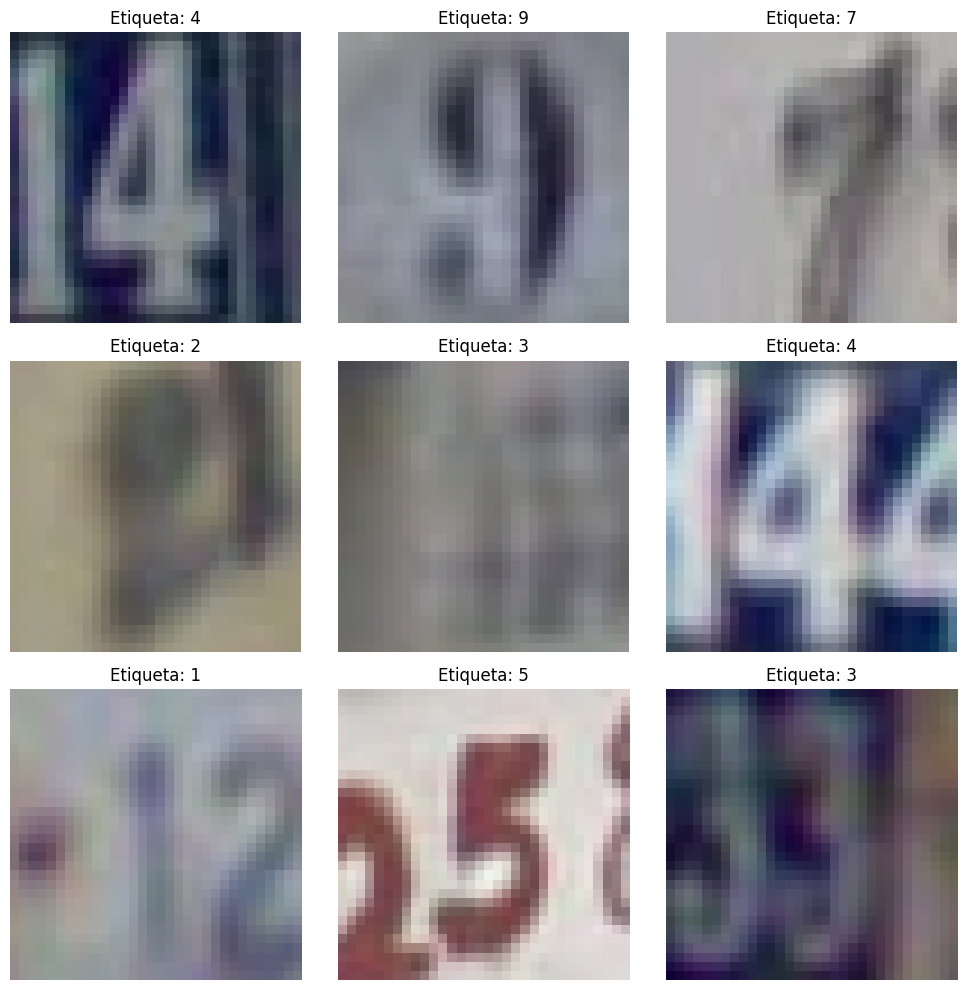

In [3]:
# Verificar etiquetas únicas en cada conjunto de datos
print("Etiquetas únicas en entrenamiento:", np.unique(y_train))
print("Etiquetas únicas en validación:", np.unique(y_valid))
print("Etiquetas únicas en prueba:", np.unique(y_test))

# Mostrar imagenes
fig, axes = plt.subplots(3, 3, figsize=(10, 10))

# Iterar a través de las imágenes y las etiquetas
for i, ax in enumerate(axes.flat):
    ax.imshow(X_train[i])
    ax.set_title(f"Etiqueta: {y_train[i]}")
    ax.axis('off')

plt.tight_layout()  # Ajusta los subplots para que no se solapen
plt.show()

2025-01-09 18:32:28.237944: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


Epoch 1/15


2025-01-09 18:32:29.166789: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 810160128 exceeds 10% of free system memory.


2061/2061 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.1816 - loss: 2.2490 - val_accuracy: 0.1994 - val_loss: 2.1562
Epoch 2/15
2061/2061 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.1932 - loss: 2.1750 - val_accuracy: 0.1994 - val_loss: 2.1415
Epoch 3/15
2061/2061 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.1956 - loss: 2.1653 - val_accuracy: 0.1994 - val_loss: 2.1420
Epoch 4/15
2061/2061 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.1951 - loss: 2.1629 - val_accuracy: 0.2007 - val_loss: 2.1560
Epoch 5/15
2061/2061 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.2003 - loss: 2.1604 - val_accuracy: 0.2083 - val_loss: 2.1391
Epoch 6/15
2061/2061 ━━━━━━━━━━━━━━━━━━━━ 21s 8ms/step - accuracy: 0.1970 - loss: 2.1584 - val_accuracy: 0.2069 - val_loss: 2.1407
Epoch 7/15
2061/2061 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.1981 - loss: 2.1579 - val_accuracy: 0.2086 - val_loss: 2.1404
Epoch 8/15
2061/2061 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.1963 - loss: 2.1597 - val

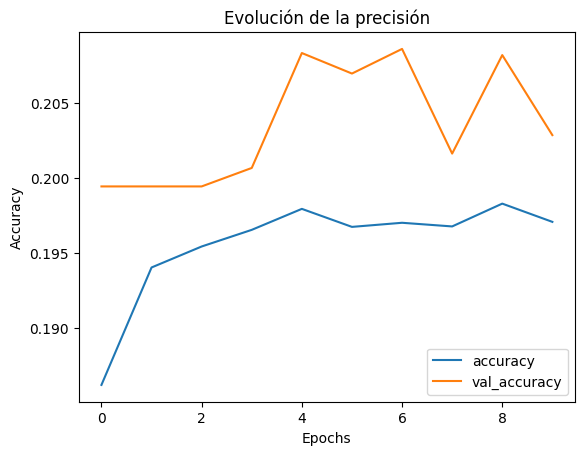

  82/2290 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.1918 - loss: 2.1397

2025-01-09 18:35:09.293086: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 900182016 exceeds 10% of free system memory.


2290/2290 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.1995 - loss: 2.1514
Precisión en el conjunto de prueba: 20.06%
  70/2290 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step 

2025-01-09 18:35:14.938050: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 900182016 exceeds 10% of free system memory.


2290/2290 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step


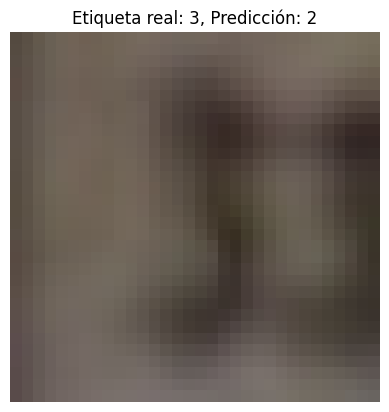

In [4]:
# Construcción del modelo
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(32, 32, 3)),
    tf.keras.layers.Flatten(),  # Aplana la imagen en un vector
    tf.keras.layers.Dense(150, activation='relu'),  # Capa densa con 150 neuronas
    tf.keras.layers.Dense(300, activation='relu'),  # Capa densa con 300 neuronas
    tf.keras.layers.Dense(128, activation='relu'),  # Capa densa con 128 neuronas
    tf.keras.layers.Dense(10, activation='softmax')  # 10 clases (dígitos 0-9)
])

# Compilación del modelo
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Detección temprana
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=3, restore_best_weights=True)

# Entrenamiento del modelo
history = model.fit(X_train, y_train, epochs=15, validation_data=(X_valid, y_valid), callbacks=[early_stopping])

# Graficar la evolución de la precisión
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Evolución de la precisión')
plt.legend(loc='lower right')
plt.show()

# Evaluación en el conjunto de prueba
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Precisión en el conjunto de prueba: {test_accuracy * 100:.2f}%")

# Predicciones
predictions = model.predict(X_test)

# Mostrar imagen con etiqueta real y predicha
idx = 10  # Puedes cambiar el índice
plt.imshow(X_test[idx])
plt.title(f"Etiqueta real: {y_test[idx]}, Predicción: {np.argmax(predictions[idx])}")
plt.axis('off')
plt.show()


## EJERCICIO 4

Predicción del consumo de energía:

* Objetivo: Construir una red neuronal para predecir el consumo de energía de edificios a partir de características como la temperatura, humedad, y tiempo del conjunto de datos Energy Efficiency de UCI Machine Learning Repository

* Tareas: 
    * Cargar el conjunto de datos, dividir los datos (train, valid y test), explorar los datos, preparar los datos (normalizar con una capa de normalización), construir un modelo de regresión, compilar y entrenar una red neuronal. 
    
    * Usa X1-X8 para la X e Y1-Y2 para la y

    * Ajusta el modelo hasta encontrar un error absoluto medio aceptable

    * Haz una gráfica de como evoluciona el error absoluto medio y error absoluto medio del conjunto de validación durante el entrenamiento

    * Evalúa el modelo en el conjunto de test y haz alguna predicción (muestra el valor predicho y el real)

In [9]:
# Descargar el conjunto de datos de eficiencia energética de UCI
url = ("https://archive.ics.uci.edu/ml/machine-learning-databases/00242/ENB2012_data.xlsx")
data = pd.read_excel(url)

In [10]:
# Dividir los datos en X (características) y Y (objetivos)
X = data.iloc[:, :-2].values  # X1-X8 (columnas de características)
Y = data.iloc[:, -2:].values  # Y1-Y2 (columnas objetivo)

# Dividir los datos en conjunto de entrenamiento, validación y prueba
X_train, X_temp, Y_train, Y_temp = train_test_split(X, Y, test_size=0.4, random_state=42)
X_valid, X_test, Y_valid, Y_test = train_test_split(X_temp, Y_temp, test_size=0.5, random_state=42)

# Normalizar los datos
normalizer = Normalization()
normalizer.adapt(X_train)  # Calculamos estadísticas de la normalización sobre X_train

# Crear un modelo secuencial
model = Sequential([
    Input(shape=(X_train.shape[1],)),  # Definir la forma de la entrada
    normalizer,  # Normalización sobre los datos de entrada
    Dense(64, activation='relu'),  # No se necesita input_shape aquí
    Dense(64, activation='relu'),
    Dense(2)  # Salida de 2 valores: Y1 y Y2
])

# Compilar el modelo
model.compile(optimizer='adam', loss='mae', metrics=['mae'])

# Ver el resumen del modelo
model.summary()


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ normalization_3 (Normalization) │ (None, 8)              │            17 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 64)             │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 2)              │           130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,883 (19.08 KB)

 Trainable params: 4,866 (19.01 KB)

 Non-trainable params: 17 (72.00 B)

Epoch 1/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 607.3985 - mae: 22.6241 - val_loss: 654.8079 - val_mae: 23.5724
Epoch 2/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 582.2460 - mae: 22.0140 - val_loss: 602.4373 - val_mae: 22.4655
Epoch 3/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 545.4352 - mae: 21.1519 - val_loss: 523.0236 - val_mae: 20.7068
Epoch 4/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 476.4522 - mae: 19.6156 - val_loss: 407.1513 - val_mae: 17.9052
Epoch 5/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 339.2198 - mae: 15.9997 - val_loss: 260.6587 - val_mae: 13.7689
Epoch 6/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 217.0441 - mae: 12.0527 - val_loss: 126.9671 - val_mae: 8.8549
Epoch 7/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 106.0786 - mae: 7.7623 - val_loss: 60.7061 - val_mae: 5.6878
Epoch 8/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 61.1256 - mae: 5.4124 - val_loss: 45.0525 - val_mae: 4.8124
Epoch 9/50
15/15 ━━━━━━━━━━━━━━

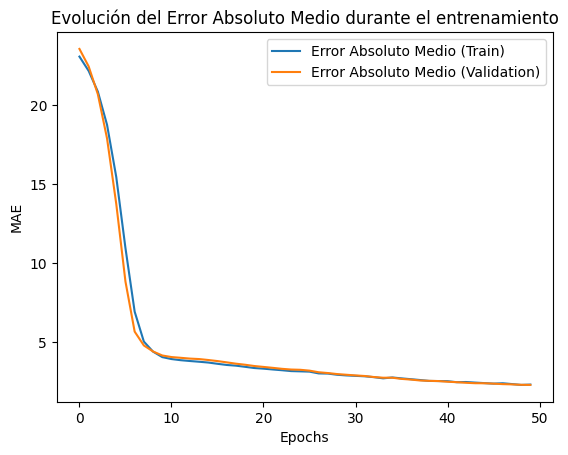

In [11]:
# Entrenar el modelo
history = model.fit(X_train, Y_train, epochs=50, batch_size=32, 
                    validation_data=(X_valid, Y_valid))

# Graficar la evolución del error absoluto medio durante el entrenamiento
plt.plot(history.history['mae'], label='Error Absoluto Medio (Train)')
plt.plot(history.history['val_mae'], label='Error Absoluto Medio (Validation)')
plt.title('Evolución del Error Absoluto Medio durante el entrenamiento')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
plt.show()


In [12]:
# Evaluar el modelo en el conjunto de test
test_loss, test_mae = model.evaluate(X_test, Y_test)
print(f"Test Loss: {test_loss}")
print(f"Test MAE: {test_mae}")

# Realizar predicciones
predictions = model.predict(X_test)

# Mostrar algunas predicciones comparadas con los valores reales
for i in range(5):
    print(f"Predicción: {predictions[i]}, Real: {Y_test[i]}")


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 11.3244 - mae: 2.4815 
Test Loss: 10.055635452270508
Test MAE: 2.2758326530456543
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Predicción: [14.028697 16.33858 ], Real: [14.66 15.64]
Predicción: [27.504827 29.969814], Real: [28.07 34.14]
Predicción: [30.828506 32.376537], Real: [24.6  29.31]
Predicción: [15.202096 17.439718], Real: [14.37 16.54]
Predicción: [28.38017  30.643627], Real: [35.89 43.3 ]
